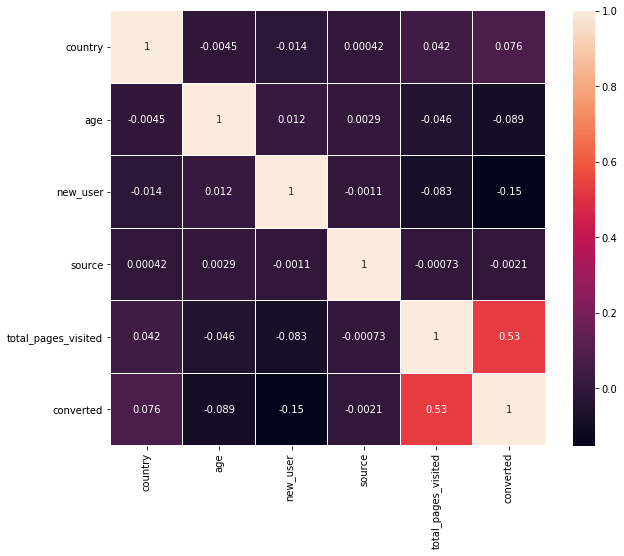

In [6]:
import numpy as np
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

df = pd.read_csv("C:\\Users\\Samir Prasun\\Desktop\\Insight data science\\Initial project -May 15th\\conversion_data.csv")  ## Read training datasets
df_old = pd.read_csv("C:\\Users\\Samir Prasun\\Desktop\\Insight data science\\Initial project -May 15th\\conversion_data.csv")  ## Read training datasets


le = LabelEncoder()

df['country'] = le.fit_transform(df['country'])
df['source'] = le.fit_transform(df['source'])

df.head()
n=df.shape[1]
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, square = True, linewidths = 0.1)
plt.ylim(n, 0)
plt.xlim(0, n)
plt.show()


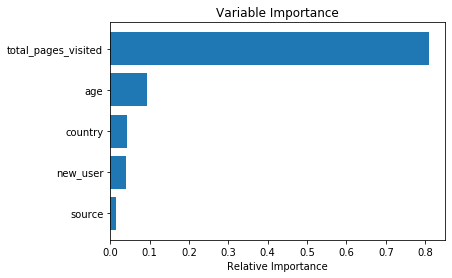

In [2]:

array=df.values
X = array[:,:5]
Y = array[:,5]



names = df.columns.values

# Build the model
rfc = RandomForestClassifier()
rfc.fit(X, Y)
# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()


Text(0, 0.5, 'Frequency of Conversion')

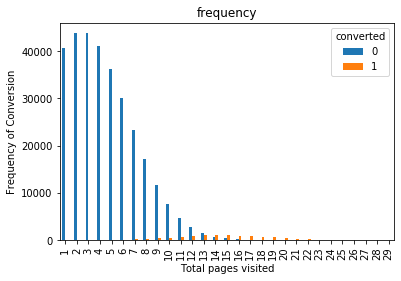

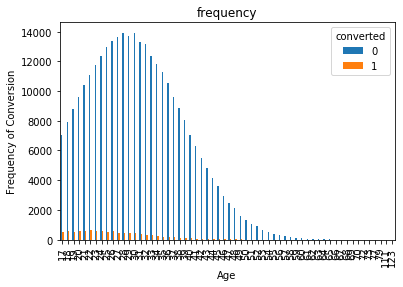

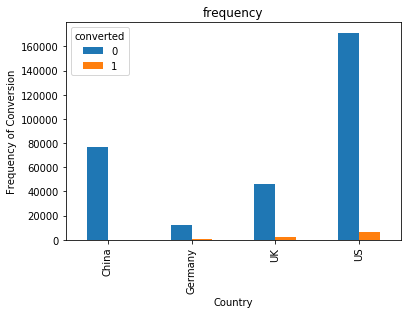

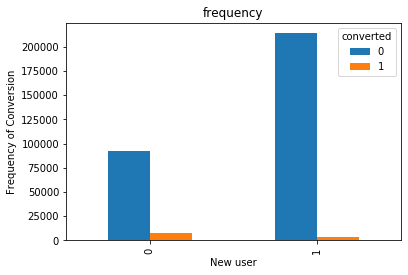

In [3]:
pd.crosstab(df.total_pages_visited,df.converted).plot(kind='bar')
plt.title('frequency')
plt.xlabel('Total pages visited')
plt.ylabel('Frequency of Conversion')

fig=pd.crosstab(df.age,df.converted).plot(kind='bar')
plt.title('frequency')
plt.xlabel('Age')
plt.ylabel('Frequency of Conversion')

pd.crosstab(df_old.country,df.converted).plot(kind='bar')
plt.title('frequency')
plt.xlabel('Country')
plt.ylabel('Frequency of Conversion')

pd.crosstab(df.new_user,df.converted).plot(kind='bar')
plt.title('frequency')
plt.xlabel('New user')
plt.ylabel('Frequency of Conversion')

In [4]:
df.drop('source', axis=1, inplace=True)
array=df.values
X = array[:,:4]
Y = array[:,4]
print(df.head)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
model_Log = LogisticRegression()
model_Log.fit(x_train,y_train)
predictions = model_Log.predict(x_test)
print(accuracy_score(y_test, predictions))

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=50)
	
...
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy))


<bound method NDFrame.head of         country  age  new_user  total_pages_visited  converted
0             2   25         1                    1          0
1             3   23         1                    5          0
2             3   28         1                    4          0
3             0   39         1                    5          0
4             3   30         1                    6          0
...         ...  ...       ...                  ...        ...
316195        3   26         1                    9          0
316196        3   27         1                    6          0
316197        0   25         0                    4          0
316198        3   22         0                    4          0
316199        2   24         0                    4          0

[316200 rows x 5 columns]>
0.9858001265022138
0.9852308665401645
0.9854048070841239





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





252960/25296

In [5]:
import statsmodels.api as sm
x=sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.042682
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.702     
Dependent Variable: y                AIC:              21603.4930
Date:               2020-05-14 18:15 BIC:              21655.6979
No. Observations:   252960           Log-Likelihood:   -10797.   
Df Model:           4                LL-Null:          -36177.   
Df Residuals:       252955           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -8.4748     0.1126   -75.2817   0.0000   -8.6954   -8.2541
x1        0.4912     0.0201    24.3884   0.0000    0.4517